In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import pandas as pd
import plotly.express as px
from scipy.fft import fft,ifft
import matplotlib.pyplot as plt
import os

In [5]:
#getting experiment list
experiments = os.listdir("Person_A")
experiments.sort()
for i in range(len(experiments)):
    if(i==0):experiments[i] = experiments[i][:-4]
    else: experiments[i] = experiments[i][:-5]
experiments = set(experiments)
experiments = list(dict.fromkeys(experiments))
print(experiments)
type(experiments)

['electrode_per_finger', 'flex_weak', 'electrode_flex_chestref', 'flex_medium', 'electrode_flex_tableref', 'electrode_flex_paper', 'electrode_flex_thumbref', 'electrode_flex_headref', 'flex_strong', 'Reference', 'Wrist_flex', 'electrode_flex_forearmref', 'flex_fingers']


list

In [6]:
#loading data
def load(person = "C",exp="Reference"):
    return pd.read_csv("Person_"+person+"/"+exp+".csv",header=None,names=["vals"])

#rectify signal
def rectify(data):
    data.vals = np.absolute(data.vals)
    return data
def rec_mean(data):
    data.vals = data.vals-data.vals.mean()
    return data

def fft_filter(data):
    fft = np.fft.fft(data.vals)
    to_filter = np.arange(950,1050)
    fft[1250+to_filter].real = 0
    fft[to_filter-1250].real = 0
    data.vals = np.fft.ifft(fft)
    return data
def moving_average(data,window_size):
    data.vals = data.vals.rolling(window_size).mean()
    return data
def plot(fig,axs,data,p,stdeb=False):
    xs = np.arange(0,len(data),1)/500
    std = data.rolling(75).std()
    axs[p].plot(xs,data,alpha=0.4)
    if(stdeb): axs[p].fill_between(xs, data.vals-std.vals, data.vals+std.vals,alpha=0.2)

In [7]:
def graph(person,exp,rc=True,rm=True,ffilt=True,ma=True,stdeb=True):
    ps = ["A","B","C"]
    ref = load(person,"Reference") #reference signal for person
    fig, axs = plt.subplots(3, 1,figsize=(10,8))

    for p in range(len(ps)):
        if(exp == "Reference"): 
            ffilt = False #if looking at reference signal, can't filter by itself
            sig = load(ps[p],exp) #signal of interest
            if(rm): sig = rec_mean(sig)
            if(rc): sig = rectify(sig)
            if(ffilt): sig = fft_filter(sig)
            if(ma!=0): sig = moving_average(sig,ma)
            plot(fig,axs,sig,p,stdeb)
        else:
            for i in range(1,4):
                sig = load(ps[p],exp+str(i)) #signal of interest
                if(rm): sig = rec_mean(sig)
                if(rc): sig = rectify(sig)
                if(ffilt): sig = fft_filter(sig)
                if(ma!=0): sig = moving_average(sig,ma)
                plot(fig,axs,sig,p,stdeb)


In [13]:
ref = load("A")
sig = load("A","flex_fingers1")
%matplotlib inline  
interact(graph, person=["A","B","C"],exp=experiments,rc=True,ffilt=False,ma=(0,500),stdeb=True);

interactive(children=(Dropdown(description='person', options=('A', 'B', 'C'), value='A'), Dropdown(description…

FileNotFoundError: [Errno 2] No such file or directory: 'Person_Person_C/computer_ref_1.csv/Reference.csv'

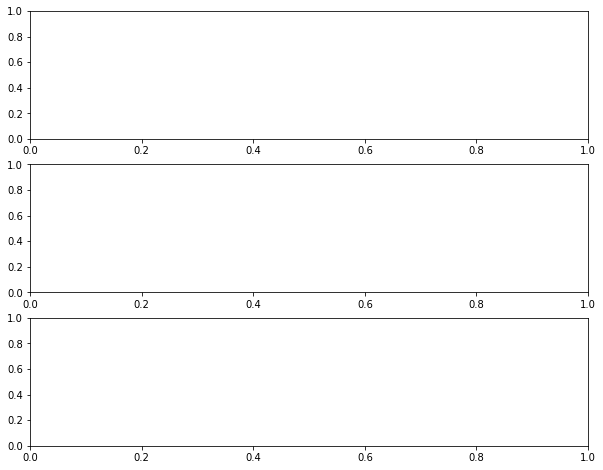

In [12]:
import matplotlib.pyplot as plt
ps = ["A","B","C"]
fig, axs = plt.subplots(3, 1,figsize=(10,8))
for a in range(0,1):
    p = ps[a]
    ref = load('Person_C/computer_ref_1.csv')
    fft = np.fft.rfft(ref)
    x = np.arange(0,1251,1)*0.2
    axs[a].plot(x,np.abs(fft))
    axs[a].set_ylim([0, 20000])